In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import wquantiles 
from statsmodels import robust 
from scipy.stats import norm

C:\Users\neera\AppData\Local\Temp\ipykernel_2188\2506961416.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('NEET_2024_RESULTS 1.csv')
df

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
...,...,...,...,...,...,...
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


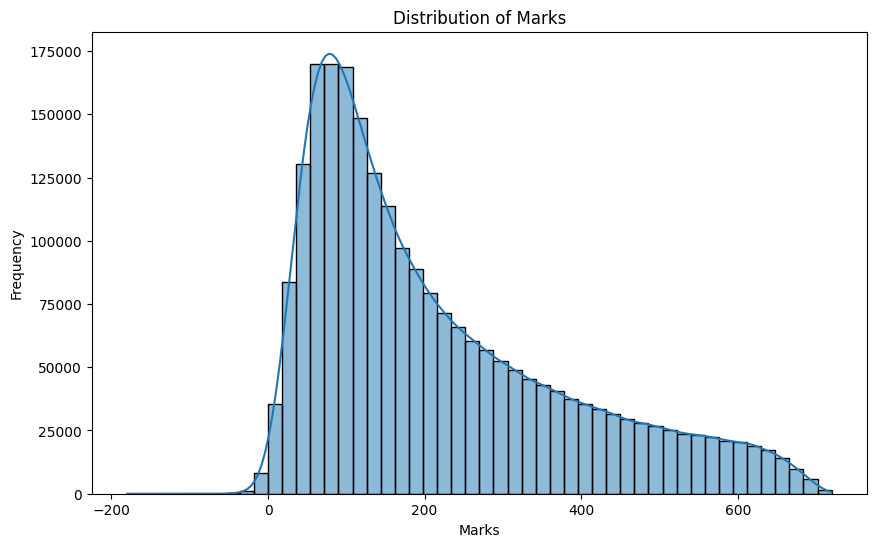

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['marks'], bins=50, kde=True)
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333120 entries, 0 to 2333119
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   dummy_srlno    int64 
 1   marks          int64 
 2   state          object
 3   city           object
 4   center_name    object
 5   center_number  int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [5]:
high_marks_df = df[df['marks'] > 700]

unique_state = high_marks_df['state'].unique()
num_unique_state = len(unique_state)

print(f"Number of unique states with students scoring above 700: {num_unique_state}")
print("States with students scoring above 700:")
for state in unique_state:
    print(state)

Number of unique states with students scoring above 700: 26
States with students scoring above 700:
ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHANDIGARH(UT)
CHHATTISGARH
DELHI
GUJARAT
HARYANA
HIMACHAL PRADESH
JAMMU AND KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
ODISHA
OUTSIDE-INDIA
PUNJAB
RAJASTHAN
TAMIL NADU
TELANGANA
TRIPURA
UTTAR PRADESH
UTTARAKHAND
WEST BENGAL


In [6]:
x1 = df[df['marks'] == 720]
x1

,dummy_srlno,marks,state,city,center_name,center_number
12526,1203040201,720,ANDHRA PRADESH,NELLORE,PADMAVATHI VIDYALAYA SULLURPETA NELLORE AP,120304
18807,1205011150,720,ANDHRA PRADESH,VIJAYAWADA,POTTI SRIRAMULU CHALAVADI MALLIKARJUNA RAO COL...,120501
19977,1205030130,720,ANDHRA PRADESH,VIJAYAWADA,KAKARAPARTI BHAVANARAYANA COLLEGE,120503
21178,1205040383,720,ANDHRA PRADESH,VIJAYAWADA,DHANEKULA INSTITUTE OF ENGINEERING & TECHNOLOGY,120504
126179,1504020621,720,BIHAR,MADHUBANI,POLE STAR,150402
...,...,...,...,...,...,...
2153287,4408010959,720,UTTAR PRADESH,LUCKNOW,S.D.S.N. MAHAVIDYALAYA,440801
2201823,4502010321,720,UTTARAKHAND,HALDWANI,SRI GURU TEG BAHADUR SR. SEC. SCHOOL,450201
2260373,4608060485,720,WEST BENGAL,KOLKATA,RCC INSTITUTE OF INFORMATION TECHNOLOGY,460806
2279106,4615020497,720,WEST BENGAL,MURSHIDABAD,GUIDANCE FOUNDATION,461502


In [7]:
x2 = x1.groupby(['state']).agg({'marks':'count'}).reset_index()
x2

,state,marks
0,ANDHRA PRADESH,4
1,BIHAR,4
2,DELHI,1
3,GUJARAT,4
4,JHARKHAND,1
5,KARNATAKA,3
6,KERALA,4
7,MAHARASHTRA,7
8,PUNJAB,4
9,RAJASTHAN,13


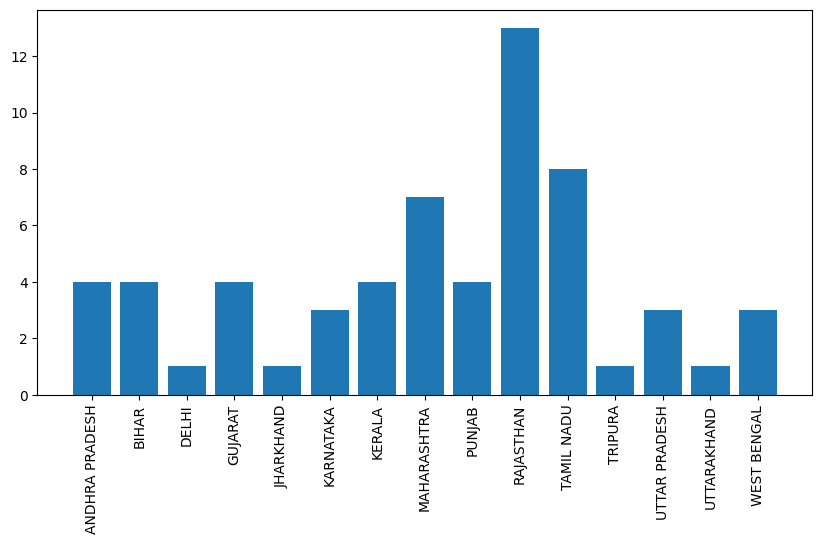

In [8]:
plt.figure(figsize = (10,5))
plt.bar(x2['state'],x2['marks'])
plt.xticks(rotation = 90)
plt.show()

In [9]:
avg_marks=df['marks'].mean()
print('avg marks of students =',avg_marks)

avg marks of students = 217.15717965642574


In [10]:
avg_marks_df=df[(df['marks']>=217)]
avg_marks_df

,dummy_srlno,marks,state,city,center_name,center_number
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
10,1101010011,322,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
...,...,...,...,...,...,...
2333101,4613120121,415,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333106,4613120126,592,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333108,4613120128,233,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333111,4613120131,250,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [11]:
df_1 = df.groupby(['center_name','center_number']).size().reset_index()
df_1

,center_name,center_number,0
0,"(UNIT-2) SCHOOL OF ENGINEERING, R.K.UNIVERSITY",220705,973
1,A G PUBLLIC SCHOOL,280620,344
2,A M N M MODEL SCHOOL CHETGANJ VARANASI UP,441103,944
3,A N COLLEGE,150201,1746
4,A V K COLLEGE FOR WOMEN,271903,356
...,...,...,...
4745,ZENITH INTERNATIONAL SCHOOL,362403,237
4746,ZENITH CONVENT SCHOOL,440521,469
4747,ZILLA PUBLIC SCHOOL,461706,472
4748,ZULAL BHILAJIRAO PATIL COLLEGE ( JAI HIND SENI...,312207,402


In [12]:
df_5 = df.groupby(['center_name','center_number','state','city']).agg({'marks':'mean'}).reset_index()
df_5

,center_name,center_number,state,city,marks
0,"(UNIT-2) SCHOOL OF ENGINEERING, R.K.UNIVERSITY",220705,GUJARAT,RAJKOT,323.129496
1,A G PUBLLIC SCHOOL,280620,KERALA,KOLLAM,191.613372
2,A M N M MODEL SCHOOL CHETGANJ VARANASI UP,441103,UTTAR PRADESH,VARANASI,226.693856
3,A N COLLEGE,150201,BIHAR,PATNA,225.987400
4,A V K COLLEGE FOR WOMEN,271903,KARNATAKA,HASSAN,197.339888
...,...,...,...,...,...
4745,ZENITH INTERNATIONAL SCHOOL,362403,ODISHA,KENDRAPARA,164.139241
4746,ZENITH CONVENT SCHOOL,440521,UTTAR PRADESH,GORAKHPUR,213.375267
4747,ZILLA PUBLIC SCHOOL,461706,WEST BENGAL,PURBA MEDINIPUR,157.531780
4748,ZULAL BHILAJIRAO PATIL COLLEGE ( JAI HIND SENI...,312207,MAHARASHTRA,DHULE,151.248756


In [13]:
df_5.tail()

,center_name,center_number,state,city,marks
4745,ZENITH INTERNATIONAL SCHOOL,362403,ODISHA,KENDRAPARA,164.139241
4746,ZENITH CONVENT SCHOOL,440521,UTTAR PRADESH,GORAKHPUR,213.375267
4747,ZILLA PUBLIC SCHOOL,461706,WEST BENGAL,PURBA MEDINIPUR,157.531780
4748,ZULAL BHILAJIRAO PATIL COLLEGE ( JAI HIND SENI...,312207,MAHARASHTRA,DHULE,151.248756
4749,GYANJYOTI K.R VIDYALAYA MAULIBHATA GADTOR NUA...,362603,ODISHA,NUAPADA,136.497006


In [14]:
df_sorted1 = df_5.sort_values(by='marks', ascending=False)
df_sorted1

,center_name,center_number,state,city,marks
1039,"DELHI PUBLIC SCHOOL, REWARI",231509,HARYANA,REWARI,406.340909
3705,SHRI ARJUNRAM MAHAVIDHYALAYA,392338,RAJASTHAN,SIKAR,396.413366
2745,NEW CENTRAL ACADEMY CHHAWANI NEEMKATHANA,392343,RAJASTHAN,SIKAR,390.276353
268,ASHA ACADEMY,392341,RAJASTHAN,SIKAR,388.800000
3424,SANSKAR BALIKA P.G. COLLEGE,392336,RAJASTHAN,SIKAR,388.498834
...,...,...,...,...,...
1762,JAWAHAR NAVODAYA VIDYALAYA,140613,ASSAM,BARPETA,80.951613
106,ALAMGANJ RANGAMATI COLLEGE,140810,ASSAM,DHUBRI,80.857778
1390,GOVT. BOYS HIGHER SECONDARY SCHOOL NARAYANPUR,171501,CHHATTISGARH,NARAYANPUR,76.940860
4323,SWAMI ATMANAND GOVT. UTKRISHT HINDI MEDIUM HIG...,170702,CHHATTISGARH,DANTEWADA,73.406877


In [15]:
df_sorted1.head(30)

,center_name,center_number,state,city,marks
1039,"DELHI PUBLIC SCHOOL, REWARI",231509,HARYANA,REWARI,406.340909
3705,SHRI ARJUNRAM MAHAVIDHYALAYA,392338,RAJASTHAN,SIKAR,396.413366
2745,NEW CENTRAL ACADEMY CHHAWANI NEEMKATHANA,392343,RAJASTHAN,SIKAR,390.276353
268,ASHA ACADEMY,392341,RAJASTHAN,SIKAR,388.800000
3424,SANSKAR BALIKA P.G. COLLEGE,392336,RAJASTHAN,SIKAR,388.498834
1042,DELHI WORLD PUBLIC SCHOOL,230507,HARYANA,BHIWANI,386.463476
3590,SGR PUBLIC SCHOOL,392333,RAJASTHAN,SIKAR,386.225951
3886,SOBHASARIA GROUP OF INSTITUTIONS,392325,RAJASTHAN,SIKAR,386.187251
4319,SVP SHIKSHAN AVAM ANUSANDHAN SANSTHAN,392329,RAJASTHAN,SIKAR,386.016771
4656,VINAYAK SR. SEC. SCHOOL,392332,RAJASTHAN,SIKAR,386.006303


<Axes: xlabel='marks', ylabel='Count'>

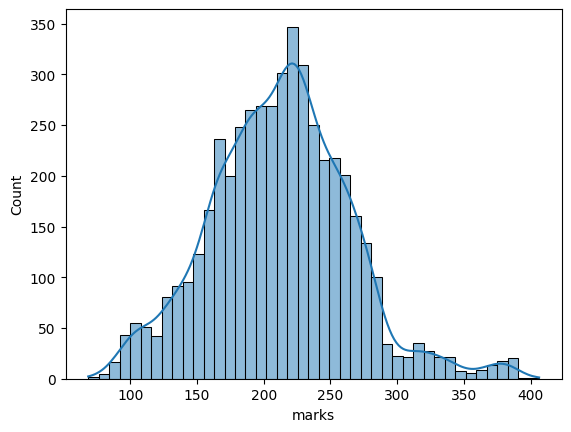

In [16]:
sns.histplot(df_5['marks'],kde=True,edgecolor='black')

In [17]:
total_candidates = df.groupby(['center_number', 'center_name']).size().reset_index(name='total_candidates')

filtered_df = df[df['marks'] > 217]
filtered_df_2 = df[df['marks'] > 600]


high_score = filtered_df.groupby(['center_name', 'state', 'city', 'center_number']).size().reset_index(name='high_score')
high_score_600 = filtered_df_2.groupby(['center_name', 'state', 'city', 'center_number']).size().reset_index(name='high_score_600')


score_df = pd.merge(total_candidates, high_score, on=['center_name', 'center_number'], how='left')
score_df = pd.merge(score_df, high_score_600, on=['center_name', 'center_number'], how='left')


score_df['high_score'] = score_df['high_score'].fillna(0).astype(int)
score_df['high_score_600'] = score_df['high_score_600'].fillna(0).astype(int)


score_df['Success Percentage'] = (score_df['high_score'] / score_df['total_candidates']) * 100

score_df

,center_number,center_name,total_candidates,state_x,city_x,high_score,state_y,city_y,high_score_600,Success Percentage
0,110101,KENDRIYA VIDYALAYA NO. 1,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,157,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,2,34.056399
1,110102,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,156,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,2,33.839479
2,110103,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,103,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,34,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,1,33.009709
3,120101,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,701,ANDHRA PRADESH,GUNTUR,377,ANDHRA PRADESH,GUNTUR,37,53.780314
4,120102,CHALAPATHI INSTITUTE OF TECHNOLOGY,586,ANDHRA PRADESH,GUNTUR,318,ANDHRA PRADESH,GUNTUR,24,54.266212
...,...,...,...,...,...,...,...,...,...,...
4745,991001,THE INDIAN SCHOOL,229,OUTSIDE-INDIA,MANAMA,129,OUTSIDE-INDIA,MANAMA,8,56.331878
4746,991101,INDIAN SCHOOL MUSCAT,312,OUTSIDE-INDIA,MUSCAT,172,OUTSIDE-INDIA,MUSCAT,12,55.128205
4747,991201,INTERNATIONAL INDIAN SCHOOL,554,OUTSIDE-INDIA,RIYADH,205,OUTSIDE-INDIA,RIYADH,6,37.003610
4748,991301,SHARJAH INDIAN SCHOOL,753,OUTSIDE-INDIA,SHARJAH,381,OUTSIDE-INDIA,SHARJAH,17,50.597610


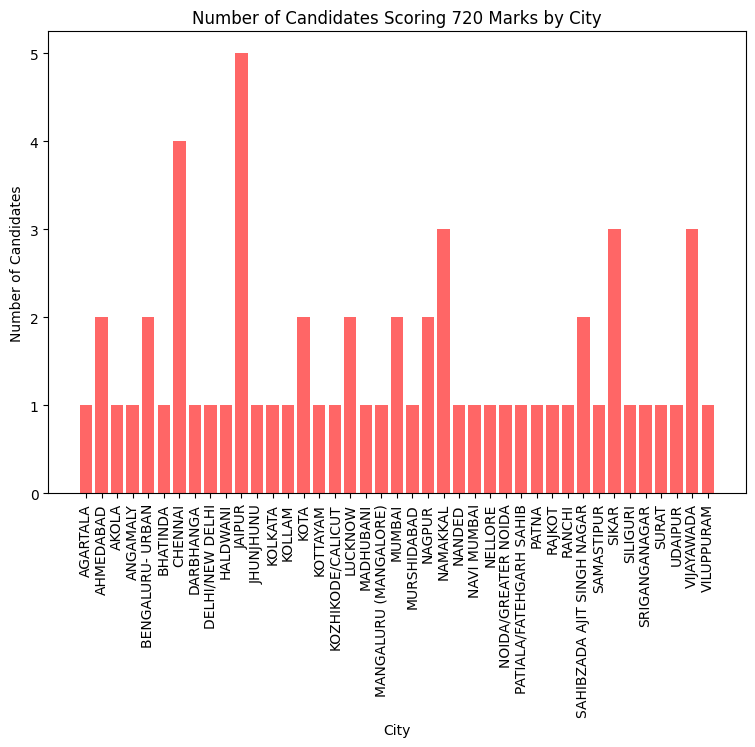

In [18]:
df_city = df[df['marks'] == 720]
df_city = df_city.groupby(['city']).agg({'marks':'count'}).reset_index()
plt.figure(figsize=(9, 6))
plt.bar(df_city['city'], df_city['marks'], color='red', alpha=0.6)


plt.title('Number of Candidates Scoring 720 Marks by City')
plt.xlabel('City')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=90)


plt.show()

In [19]:
total_candidates = df.groupby(['center_number', 'center_name']).size().reset_index(name='total_candidates')

x_df = df[df['marks'] > 217]
x_df_2 = df[(df['marks'] > 650)]

high_score = x_df.groupby(['center_name', 'center_number', 'state', 'city']).size().reset_index(name='high_score')
high_score_650 = x_df_2.groupby(['center_name', 'center_number', 'state', 'city']).size().reset_index(name='high_score_650')

score_df = pd.merge(total_candidates, high_score, on=['center_name', 'center_number'], how='left')
score_df = pd.merge(score_df, high_score_650, on=['center_name', 'center_number', 'state', 'city'], how='left')

score_df['high_score'] = score_df['high_score'].fillna(0).astype(int)
score_df['high_score_650'] = score_df['high_score_650'].fillna(0).astype(int)
score_df['Success Percentage'] = (score_df['high_score'] / score_df['total_candidates']) * 100

score_df

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
0,110101,KENDRIYA VIDYALAYA NO. 1,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,157,1,34.056399
1,110102,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,156,2,33.839479
2,110103,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,103,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,34,0,33.009709
3,120101,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,701,ANDHRA PRADESH,GUNTUR,377,19,53.780314
4,120102,CHALAPATHI INSTITUTE OF TECHNOLOGY,586,ANDHRA PRADESH,GUNTUR,318,6,54.266212
...,...,...,...,...,...,...,...,...
4745,991001,THE INDIAN SCHOOL,229,OUTSIDE-INDIA,MANAMA,129,3,56.331878
4746,991101,INDIAN SCHOOL MUSCAT,312,OUTSIDE-INDIA,MUSCAT,172,1,55.128205
4747,991201,INTERNATIONAL INDIAN SCHOOL,554,OUTSIDE-INDIA,RIYADH,205,2,37.003610
4748,991301,SHARJAH INDIAN SCHOOL,753,OUTSIDE-INDIA,SHARJAH,381,7,50.597610


In [20]:
students_above_650 = df[df['marks'] > 650]


high_score_650 = students_above_650.groupby(['center_number', 'center_name', 'state', 'city']).size().reset_index(name='high_score_650')


print(high_score_650)

      center_number                              center_name  \
0            110101                 KENDRIYA VIDYALAYA NO. 1   
1            110102  DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY   
2            120101      LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
3            120102       CHALAPATHI INSTITUTE OF TECHNOLOGY   
4            120103     R.V.R. & J.C. COLLEGE OF ENGINEERING   
...             ...                                      ...   
4031         990601                      M E S INDIAN SCHOOL   
4032         991001                        THE INDIAN SCHOOL   
4033         991101                     INDIAN SCHOOL MUSCAT   
4034         991201              INTERNATIONAL INDIAN SCHOOL   
4035         991301                    SHARJAH INDIAN SCHOOL   

                                 state        city  high_score_650  
0     ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR               1  
1     ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR               2  
2                       

In [21]:
students_above_650 = df[df['marks'] > 650]
students_above_650_sikar = students_above_650[students_above_650['city'].str.upper() == 'SIKAR']
count_students_above_650_sikar = students_above_650_sikar.shape[0]
print(f"Number of students in Sikar city who scored above 650 marks: {count_students_above_650_sikar}")# out of 27000 students.7.5%

Number of students in Sikar city who scored above 650 marks: 1937


In [22]:
students_above_650 = df[df['marks'] > 650]
students_above_650_rajkot = students_above_650[students_above_650['city'].str.upper() == 'RAJKOT']
count_students_above_650_rajkot = students_above_650_rajkot.shape[0]
print(f"Number of students in Rajkot city who scored above 650 marks: {count_students_above_650_rajkot}") # 3.8%

Number of students in Rajkot city who scored above 650 marks: 174


In [23]:
students_above_650 = df[df['marks'] > 650]
students_above_650_namamakl = students_above_650[students_above_650['city'].str.upper() == 'NAMAKKAL']
count_students_above_650_namakkal = students_above_650_namakal.shape[0]
print(f"Number of students in delhi city who scored above 650 marks: {count_students_above_650_namakal}") # 5.1% 

Number of students in delhi city who scored above 650 marks: 296


In [38]:
students_above_650 = df[df['marks'] > 650]
students_above_650_vijayawada = students_above_650[students_above_650['city'].str.upper() == 'VIJAYAWADA']
count_students_above_650_vijayawada = students_above_650_delhi.shape[0]
print(f"Number of students in vijayawada city who scored above 650 marks: {count_students_above_650_vijayawada}")

Number of students in vijayawada city who scored above 650 marks: 1033


In [25]:
students_above_650 = df[df['marks'] > 650]
students_above_650_delhi = students_above_650[students_above_650['city'].str.upper() == 'REWARI']
count_students_above_650_delhi = students_above_650_delhi.shape[0]
print(f"Number of students in delhi city who scored above 650 marks: {count_students_above_650_delhi}")

Number of students in delhi city who scored above 650 marks: 106


In [26]:
students_above_650 = df[df['marks'] > 650]
students_above_650_jaipur = students_above_650[students_above_650['city'].str.upper() == 'JAIPUR']
count_students_above_650_jaipur = students_above_650_jaipur.shape[0]
print(f"Number of students in jaipur city who scored above 650 marks: {count_students_above_650_jaipur}")

Number of students in delhi city who scored above 650 marks: 1613


In [27]:
students_above_650 = df[df['marks'] > 650]
students_above_650_delhi = students_above_650[students_above_650['city'].str.upper() == 'KOTA']
count_students_above_650_delhi = students_above_650_delhi.shape[0]
print(f"Number of students in delhi city who scored above 650 marks: {count_students_above_650_delhi}")

Number of students in delhi city who scored above 650 marks: 1033


In [28]:
score_df[score_df['Success Percentage'] == max(score_df['Success Percentage'])]

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
3398,392338,SHRI ARJUNRAM MAHAVIDHYALAYA,404,RAJASTHAN,SIKAR,317,34,78.465347


In [29]:
score_df[score_df['Success Percentage'] == min(score_df['Success Percentage'])]

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
212,140810,ALAMGANJ RANGAMATI COLLEGE,225,ASSAM,DHUBRI,7,0,3.111111


In [30]:
score_df.head(100)

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
0,110101,KENDRIYA VIDYALAYA NO. 1,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,157,1,34.056399
1,110102,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,156,2,33.839479
2,110103,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,103,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,34,0,33.009709
3,120101,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,701,ANDHRA PRADESH,GUNTUR,377,19,53.780314
4,120102,CHALAPATHI INSTITUTE OF TECHNOLOGY,586,ANDHRA PRADESH,GUNTUR,318,6,54.266212
...,...,...,...,...,...,...,...,...
95,122002,SRI CHAITANYA TECHNO SCHOOL,488,ANDHRA PRADESH,KAKINADA,196,6,40.163934
96,122003,AKSHARA SCHOOL,351,ANDHRA PRADESH,KAKINADA,139,5,39.601140
97,122004,SUBHANIKETAN SCHOOL,307,ANDHRA PRADESH,KAKINADA,112,3,36.482085
98,122005,LAKSHYA INTERNATIONAL SCHOOL,283,ANDHRA PRADESH,KAKINADA,123,3,43.462898


In [31]:
new_score_df = score_df[score_df['Success Percentage'] >73]
new_score_df

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
37,120506,PALADUGU PARVATHI DEVI COLLEGE OF ENGINEERING ...,613,ANDHRA PRADESH,VIJAYAWADA,469,9,76.508972
38,120507,VIKAS GROUP OF INSTITUTIONS,614,ANDHRA PRADESH,VIJAYAWADA,465,26,75.732899
42,120511,BHASHYAM(E.M) HIGH SCHOOL,499,ANDHRA PRADESH,VIJAYAWADA,385,9,77.154309
44,120513,CHITTURI HIGH SCHOOL,503,ANDHRA PRADESH,VIJAYAWADA,381,10,75.745527
45,120514,SRI VIJNAN VIHARA EM SCHOOL,498,ANDHRA PRADESH,VIJAYAWADA,386,16,77.510040
53,120522,KVSR SIDDHARTHA COLLEGE OF PHARMACEUTICAL SCIE...,402,ANDHRA PRADESH,VIJAYAWADA,301,12,74.875622
732,220301,GYANMANJARI INSTITUTE OF TECHNOLOGY BHAVNAGAR,594,GUJARAT,BHAVNAGAR,455,21,76.599327
758,220701,UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY,1968,GUJARAT,RAJKOT,1500,110,76.219512
931,230507,DELHI WORLD PUBLIC SCHOOL,397,HARYANA,BHIWANI,301,28,75.818640
989,231509,"DELHI PUBLIC SCHOOL, REWARI",264,HARYANA,REWARI,204,24,77.272727


In [32]:
df_sorted = new_score_df.sort_values(by='high_score', ascending=False)
df_sorted

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
758,220701,UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY,1968,GUJARAT,RAJKOT,1500,110,76.219512
3367,392307,GURUKUL INTERNATIONAL SCHOOL,715,RAJASTHAN,SIKAR,534,62,74.685315
3368,392308,MAHATMA GANDHI INT. SCHOOL,703,RAJASTHAN,SIKAR,529,61,75.248933
3374,392314,VARDA SMART SCHOOL,714,RAJASTHAN,SIKAR,527,64,73.809524
3371,392311,SHRI MANGAL CHAND DIDWANIYA VIDYA MANDIR (CBSE),716,RAJASTHAN,SIKAR,526,48,73.463687
3370,392310,SHRI BALAJI COLLEGE,716,RAJASTHAN,SIKAR,525,54,73.324022
3369,392309,MAHATMA GANDHI P.G. COLLEGE,713,RAJASTHAN,SIKAR,522,50,73.211781
3375,392315,MODY INSTITUTE OF TECHNOLOGY,668,RAJASTHAN,SIKAR,496,53,74.251497
3507,410803,THE NAVODAYA ACADEMY SENIOR SECONDARY SCHOOL,659,TAMIL NADU,NAMAKKAL,490,39,74.355083
37,120506,PALADUGU PARVATHI DEVI COLLEGE OF ENGINEERING ...,613,ANDHRA PRADESH,VIJAYAWADA,469,9,76.508972


In [33]:
df_sorted = new_score_df.sort_values(by='Success Percentage', ascending=False)
df_sorted

,center_number,center_name,total_candidates,state,city,high_score,high_score_650,Success Percentage
3398,392338,SHRI ARJUNRAM MAHAVIDHYALAYA,404,RAJASTHAN,SIKAR,317,34,78.465347
3401,392341,ASHA ACADEMY,355,RAJASTHAN,SIKAR,277,30,78.028169
45,120514,SRI VIJNAN VIHARA EM SCHOOL,498,ANDHRA PRADESH,VIJAYAWADA,386,16,77.510040
989,231509,"DELHI PUBLIC SCHOOL, REWARI",264,HARYANA,REWARI,204,24,77.272727
42,120511,BHASHYAM(E.M) HIGH SCHOOL,499,ANDHRA PRADESH,VIJAYAWADA,385,9,77.154309
3393,392333,SGR PUBLIC SCHOOL,447,RAJASTHAN,SIKAR,344,33,76.957494
3389,392329,SVP SHIKSHAN AVAM ANUSANDHAN SANSTHAN,477,RAJASTHAN,SIKAR,367,38,76.939203
3377,392317,SUNRISE INTERNATIONAL PUBLIC SCHOOL,592,RAJASTHAN,SIKAR,455,44,76.858108
732,220301,GYANMANJARI INSTITUTE OF TECHNOLOGY BHAVNAGAR,594,GUJARAT,BHAVNAGAR,455,21,76.599327
37,120506,PALADUGU PARVATHI DEVI COLLEGE OF ENGINEERING ...,613,ANDHRA PRADESH,VIJAYAWADA,469,9,76.508972


In [34]:
df_3=df[df['marks']>163]
df_3=df_3.groupby(['state']).agg({'marks':'count'}).reset_index()
df_3

,state,marks
0,ANDAMAN AND NICOBAR ISLANDS (UT),488
1,ANDHRA PRADESH,38950
2,ARUNACHAL PRADESH,1785
3,ASSAM,18953
4,BIHAR,57029
5,CHANDIGARH(UT),2571
6,CHHATTISGARH,19110
7,DADRA AND NAGAR HAVELI (UT),653
8,DAMAN AND DIU (UT),343
9,DELHI,41295


In [35]:
df_3=df_3.sort_values(by='marks',ascending=False)
df_3

,state,marks
35,UTTAR PRADESH,143651
21,MAHARASHTRA,127455
30,RAJASTHAN,123821
16,KARNATAKA,76689
17,KERALA,76610
32,TAMIL NADU,75382
37,WEST BENGAL,58392
4,BIHAR,57029
11,GUJARAT,51186
20,MADHYA PRADESH,50263
